# Creating the Data Set

We begin by converting the data, which is in the form of jpg pictures, to a labelled data frame

In [1]:
import os
import pandas as pd 
import numpy as np
import skimage
import skimage.io
import matplotlib.pyplot as plt


# We load the data frame containing the indexes
def load_chinese_data(file="chinese_mnist.csv", ):    
    return(pd.read_csv(os.path.join("../datasets/chinese_mnist",file)))
    

index = load_chinese_data()     

# We check whether its what we want
index.head()


# We define a set of useful functions :

# This function will convert the csv data set to matching jpg files
def create_file_name(x):
    file_name = f"input_{x[0]}_{x[1]}_{x[2]}.jpg"
    return file_name

# We add the names of the files (one file per image) to the corresponding line in the csv file
index["file"] = index.apply(create_file_name, axis=1)

# We check 
print(index['file'])
index.tail()

0         input_1_1_10.jpg
1        input_1_10_10.jpg
2         input_1_2_10.jpg
3         input_1_3_10.jpg
4         input_1_4_10.jpg
               ...        
14995     input_99_5_9.jpg
14996     input_99_6_9.jpg
14997     input_99_7_9.jpg
14998     input_99_8_9.jpg
14999     input_99_9_9.jpg
Name: file, Length: 15000, dtype: object


,suite_id,sample_id,code,value,character,file
14995,99,5,9,8,八,input_99_5_9.jpg
14996,99,6,9,8,八,input_99_6_9.jpg
14997,99,7,9,8,八,input_99_7_9.jpg
14998,99,8,9,8,八,input_99_8_9.jpg
14999,99,9,9,8,八,input_99_9_9.jpg


In [2]:
# We now define a function that returns the shape of an image
def read_image_sizes(file_name):
    image = skimage.io.imread("../datasets/chinese_mnist/images/" + file_name)
    return list(image.shape)

# We convert the images, which are arrays, to vectors (flattening) 
def read_image_pixels(file_name):
    image = skimage.io.imread("../datasets/chinese_mnist/images/" + file_name)
    return np.resize(image,64*64)

# We show an image (using the file)
# It is useful to be sure we didn't mess up somewhere
def show_image(file_name):
    image =skimage.io.imread("../datasets/chinese_mnist/images/" + file_name)
    plt.imshow(image)

# We show an image using the vector representation (to check if the data frame is well defined)
def show_df(row,data_frame):
    image = data_frame[row].to_numpy()
    image = np.resize(image,(64,64))
    plt.imshow(image)

# We build a function to show a picture form its flattened representation (with a numpy array as input)
def show_pic(vect):
    plt.figure()
    plt.imshow(np.resize(vect,(64,64)),cmap=None,)



,1,2,3,4,5,6,7,8,9,10,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,code
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


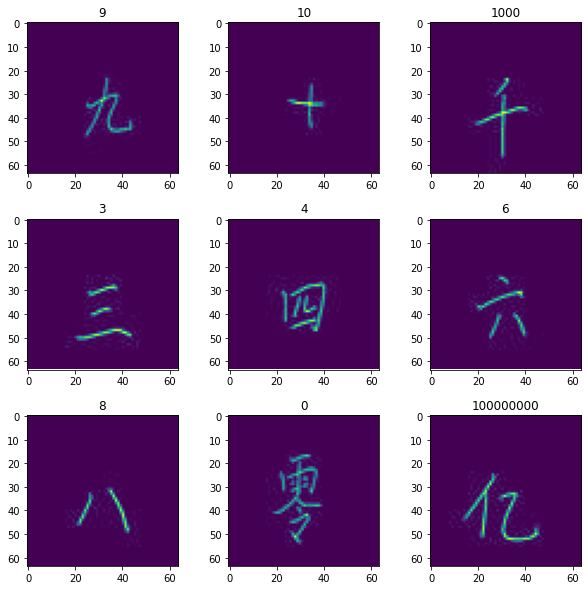

In [3]:
# m is the matrix containing 15000 lines (the images), and their 4096 columns, which are the pixels
# There are 15k images each one being 64*64 pixels
# We apply the read_image_pixels function to the column file to get the pixels of each image from the name of the file
m = np.stack(index['file'].map(read_image_pixels))

# Convert the numpy array to a data frame 
df = pd.DataFrame(m)

# We rename the columns (more convenient)
df.columns = range(1,4097)

# We show some images to see if we correctly converted them

fig, axe = plt.subplots(3,3,figsize=(10,10))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

axe[0,0].imshow(np.resize(df.iloc[1,],(64,64)))
axe[0,0].set_title(index['value'].iloc[1,])

axe[0,1].imshow(np.resize(df.iloc[1500,],(64,64)))
axe[0,1].set_title(index['value'].iloc[1500,])

axe[0,2].imshow(np.resize(df.iloc[3000,],(64,64)))
axe[0,2].set_title(index['value'].iloc[3000,])

axe[1,0].imshow(np.resize(df.iloc[9000,],(64,64)))
axe[1,0].set_title(index['value'].iloc[9000,])

axe[1,1].imshow(np.resize(df.iloc[10000,],(64,64)))
axe[1,1].set_title(index['value'].iloc[10000,])

axe[1,2].imshow(np.resize(df.iloc[12000,],(64,64)))
axe[1,2].set_title(index['value'].iloc[12000,])

axe[2,0].imshow(np.resize(df.iloc[14000,],(64,64)))
axe[2,0].set_title(index['value'].iloc[14000,])

axe[2,1].imshow(np.resize(df.iloc[6000,],(64,64)))
axe[2,1].set_title(index['value'].iloc[6000,])

axe[2,2].imshow(np.resize(df.iloc[5000,],(64,64)))
axe[2,2].set_title(index['value'].iloc[5000,])

# The characters matching the powers of 10 to a billion are included 

#The images appear to have been correctly converted

# This is the cleansed data frame (The one that should be exported to CSV)
dataframe = pd.concat([df,index['code']],axis=1, sort=False)
dataframe.head()

In [4]:
# We keep the relevant information to create the X and y arrays 

# We convert the dataframe to numpy
data = dataframe.to_numpy()

# The matrix of pixels
X = data[:,0:4096]
# The vector of labels
y = data[:,4096]

# Assessing the shapes
print(X.shape)
print(y.shape)

(15000, 4096)
(15000,)


(12000, 4096)
(3000, 4096)
(12000,)
(3000,)


(array([160., 160., 160., 160., 160., 160., 160., 160., 160., 160., 160.,
        160., 160., 160., 160.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 15 Patch objects>)

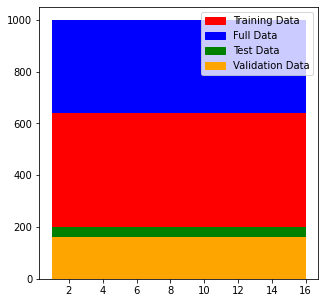

In [5]:
# We will use a validation set and a test set

# As we begin random processes, we set the seed 

RANDOM_STATE = 42

# We will also stratify the split, in order to avoid getting an unbalanced training set

# Here we see the plot of the histogram of the initial data, which is 
# completely balanced with 1000 instances per class
# we will try to recreate that in our splitting 
plt.figure(figsize=(5,5))
plt.hist(y,range(1,17), color = 'blue')


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,random_state = RANDOM_STATE,test_size = 0.20, stratify = y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# The data seems to be correctly balanced
# We will do one more splitting to create a validation set 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = RANDOM_STATE,test_size = 0.20, stratify = y_train)

# We check that we have correctly recreated the distribution
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Full Data')
red_patch = mpatches.Patch(color='red', label='Training Data')
green_patch = mpatches.Patch(color='green', label='Test Data')
orange_patch = mpatches.Patch(color='orange', label='Validation Data')

plt.legend(handles=[red_patch,blue_patch,green_patch,orange_patch])
plt.hist(y_train,range(1,17),color = 'red')
plt.hist(y_test, range(1,17),color = 'green')
plt.hist(y_val, range(1,17), color = 'orange')

# Building a first benchmark model

We build a simple random forest model to set a benchmark of performance and analyse the important pixels in the images

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

# We time the training
import time
tic = time.time()
rf.fit(X=X_train, y=y_train)
toc = time.time()

In [7]:
# We test the model on the validation set 
pred = rf.predict(X_val)

# We check the size of the predicted values (expected: (X_val[0],))
print('Shape of the validation X set: ',X_val.shape)
print('Shape of the prediction: ',pred.shape)

Shape of the validation X set:  (2400, 4096)
Shape of the prediction:  (2400,)


In [8]:
# We test the accuracy of the benchmark model
from sklearn.metrics import accuracy_score
print('Training duration', toc-tic)
print('Accuracy of the Benchmark model (Random Forest with 500 estimators) : ',np.round(accuracy_score(pred, y_val),3))

Training duration 41.14447808265686
Accuracy of the Benchmark model (Random Forest with 500 estimators) :  0.654


We notice that the model is doing alright, in the sense that it is much better than a random classifier (which would have an accuracy of approximately 1/16). However, it is still mistaken quite often. We will now raise the number of estimators to see if we manage to achieve a better accuracy. We also notice that despite the high number of parameters the training is quite fast. 

In [9]:
#rf = RandomForestClassifier(n_estimators=5000)
# We time the training 
#import time
#tic = time.time()
#rf.fit(X=X_train, y=y_train)
#toc = time.time()
#pred = rf.predict(X_val)
#print('Training duration', toc-tic)
#print('Accuracy of the Benchmark model (Random Forest with 5000 estimators) : ',np.round(accuracy_score(pred, y_val),3))

We notice that the training gets much slower with more estimators. The accuracy doesn't improve that much either. We will consider this our benchmark model, and try later to improve it using cross validation and hyper-parameter tuning. For now we will look at what this first model can tell us about the data set. 

We first begin by looking at the confusion matrix to see which classes are being confused by the model. 

Confusion matrix :
 [[135   0   0   0   3   0   0   0   0   0   0  15   4   3   0]
 [  0 149   9   1   0   0   0   0   0   0   1   0   0   0   0]
 [  1  14 109  21   0   0   4   2   6   0   2   0   1   0   0]
 [  1   3  37 106   1   2   6   1   0   0   0   0   3   0   0]
 [ 11   1   0   0 119   1   5   7   1   0   3   3   0   4   5]
 [ 16   0   4  17   2  88   2   2   5   3   0   7   4  10   0]
 [  4   3   3   5   2   1  97   9  21   2   1   0   5   4   3]
 [  7   5   7   1   4   3   9  89   5  10   5   2   3   5   5]
 [  0  11   4   3   0   0  10   2 125   2   1   0   1   0   1]
 [  7   2   3   5   1  12  17  13   2  72   0   1   2   6  17]
 [  4   6   3   1   0   0   1   4   0   0 118   0  22   1   0]
 [ 24   0   2   0   3   7   5  15   0   0   2  74   1  22   5]
 [ 11   1   1   0   1   0   4   3   4   0  26   1 104   4   0]
 [ 15   0   0   2   2   7   5  11   2   0   3  14   5  93   1]
 [  7   0   3   3   3   1  11  17   8   8   1   0   6   1  91]]


<function matplotlib.pyplot.show(*args, **kw)>

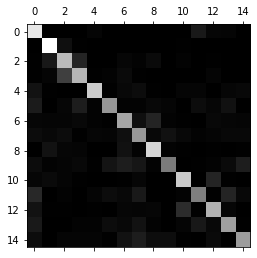

In [10]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_val,pred)
print('Confusion matrix :\n',conf_mx)

# With a plot 

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show

This matrix is not very readable. We will try to normalize the confusion matrix to make it easier to interpret. 

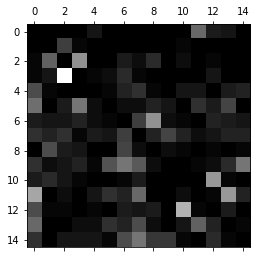

In [11]:
# We get the total number of examples
row_sums = conf_mx.sum(axis=1, keepdims=True)
# We divide the confusion matrix by the number of examples
norm_conf_mx = np.round(conf_mx / row_sums,3)
# Since we don't care about the example that we didn't confuse, we set the diagonal at zero
# This will give the rest more contrast
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

We notice a few confusions, all of which are understandable with regard to the way the numbers are written in chinese. The most confusion is made between twos and threes. 

The random forest classifier also contains tools to quantify the importance of the features. We will use it to get an idea of the most important pixels of the data set. 

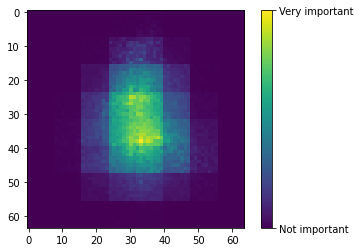

In [12]:
plt.imshow(np.resize(rf.feature_importances_,(64,64)))

cbar = plt.colorbar(ticks=[rf.feature_importances_.min(), rf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

We notice that the most important pixels are located in the center. A number of pixels at the edge are mostly non important since they are often equal to zero. This is to be expected, since the pictures are supposed to be centered. A way to improve our models, both in training and in performance, would be to reduce the dimension of our data set to less than 4096 parameters. 

# Processing our data set

As our data set is not that complex (only pictures of numbers) we have very few possibilities to process our data. Our course of action is mainly to scale the data set, reduce its dimension, and eventually artificially augment the number of instances for the classes that are hard to learn. We can also use a clustering algorithm before building a supervised learning model. 
Once all the preprocessing has been done we will build a preprocessing pipeline to automate the preprocessing. 

We will begin by rescaling the data. 

In [13]:
# We now look at the range of values taken by the pixels in the data set
print('The value of the biggest pixel: ',np.max(X_train))
print('The value of the smallest pixel: ',np.min(X_train))

# We normalise by dividing the values of the pixel with 255
X_train = X_train/255

# We check that the values have been correcly transformed
print('The value of the biggest pixel after normalization: ',np.max(X_train))
print('The value of the smallest pixel after normalization: ',np.min(X_train))

The value of the biggest pixel:  255
The value of the smallest pixel:  0
The value of the biggest pixel after normalization:  1.0
The value of the smallest pixel after normalization:  0.0


Now the pixels vary from 0 to 1 instead of from 0 to 255. 

We will now try to reduce the dimension of the data. Reducing dimensionality using PCA is not always good. It sometimes slows down the training while making the resulting algorithms less precise. We will begin by first fitting a PCA transformer. 

In [14]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=0.95)
#X_reduced = pca.fit_transform(X_train)

In [15]:
#X_reversed = pca.inverse_transform(X_reduced)

In [16]:
#rf = RandomForestClassifier(n_estimators=500)
# We time the training to compare with the non reduced data set

#tic = time.time()
#rf.fit(X=X_reduced, y=y_train)
#toc = time.time()

In [17]:
#pred = rf.predict(pca.transform(X_val))
#print('Training duration after dimensionality reduction', toc-tic)
#print('Accuracy of the Benchmark model (Random Forest with 500 estimators) after dimensionality reduction: ',np.round(accuracy_score(pred, y_val),3))

The training lasted for much longer that before the PCA, and led to an accuracy that's far worse.

We will try another technique called LLE before moving on to something else. 

In [18]:
#from sklearn.manifold import LocallyLinearEmbedding

#lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
#lle.fit_transform(X_train)

The dimensionality reduction is way too long, while it didn't take that long to train the random forest with 5000 estimators ... We try nevertheless the Locally Linear Embedding to see if it can improve the accuracy. 

In [19]:
#X_lle = lle.transform(X_train)
#tic = time.time()
#rf.fit(X=X_lle, y=y_train)
#toc = time.time()

#pred = rf.predict(lle.transform(X_val))
#print('Training duration after dimensionality reduction', toc-tic)
#print('Accuracy of the Benchmark model after LLE: ',np.round(accuracy_score(pred, y_val),3))

On applique une méthode de clustering en traitement préliminaire afin d'améliorer la précision de notre modèle. 

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
X_reduced = tsne.fit_transform(X_train)

<function matplotlib.pyplot.show(*args, **kw)>

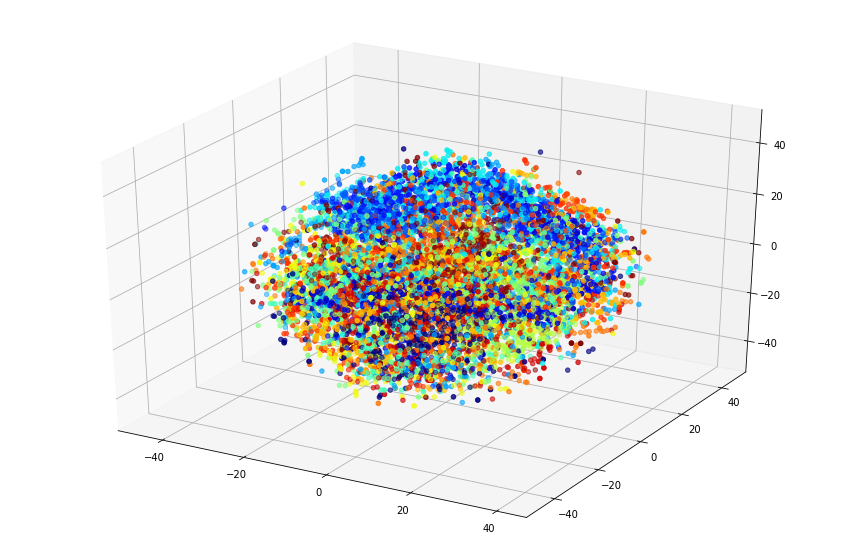

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(15,10)).gca(projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1],X_reduced[:,2] ,c=y_train, cmap="jet")
plt.show

This plot speaks volume about the complexity of the data in comparison to MNIST for instance. The instances are far more confused by the t-SNE algorithm, and it seems that using a clustering algorithm as a pre-processing layer is useless. We will try to build a clustering algorithm and evaluate its performance to get an idea. 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
pred = knn.predict(X_val)
print("Accuracy for a clustering algorithm: ",accuracy_score(pred,y_val))

The k-means algorithm score around 45% accuracy, with 5 nearest neighbors. We will try to improve it a bit by finding a better number of neighbors. 

In [ ]:
for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_val)
    print("Accuracy for KNN with k = %d: " %k,accuracy_score(pred,y_val))

We notice that the KNN algorithm tends to be more accurate for small values of k. We keep the 1-nn algorithm. 

# CNN 

We now look at the performance of a Deep Convolutional Network. We will use the same CNN used for classification of the MNIST data set. 

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,models

# We convert the images back to 64*64
X_train_reshaped = X_train.reshape((9600,64,64,1))
X_val_reshaped = X_val.reshape((X_val.shape[0],64,64,1))
X_test_reshaped = X_test.reshape((X_test.shape[0],64,64,1))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 1),padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(16, activation='softmax'))

In [28]:
model.summary()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)       

In [29]:
from tensorflow.keras.utils import to_categorical
y_train_reshaped = to_categorical(y_train)
y_val_reshaped = to_categorical(y_val)
y_test_reshaped = to_categorical(y_test)

In [30]:
history = model.fit(X_train_reshaped,y_train_reshaped,validation_data =(X_val_reshaped,y_val_reshaped),epochs=30, batch_size=100)

Epoch 1/30
96/96 [==============================] - 2s 21ms/step - loss: 2.3635 - accuracy: 0.4398 - val_loss: 0.7870 - val_accuracy: 0.7492
Epoch 2/30
96/96 [==============================] - 2s 20ms/step - loss: 0.6263 - accuracy: 0.7881 - val_loss: 0.3219 - val_accuracy: 0.9025
Epoch 3/30
96/96 [==============================] - 2s 19ms/step - loss: 0.3416 - accuracy: 0.8857 - val_loss: 0.1539 - val_accuracy: 0.9575
Epoch 4/30
96/96 [==============================] - 2s 20ms/step - loss: 0.2437 - accuracy: 0.9186 - val_loss: 0.1323 - val_accuracy: 0.9596
Epoch 5/30
96/96 [==============================] - 2s 20ms/step - loss: 0.1994 - accuracy: 0.9371 - val_loss: 0.0975 - val_accuracy: 0.9692
Epoch 6/30
96/96 [==============================] - 2s 20ms/step - loss: 0.1535 - accuracy: 0.9506 - val_loss: 0.0850 - val_accuracy: 0.9767
Epoch 7/30
96/96 [==============================] - 2s 19ms/step - loss: 0.1245 - accuracy: 0.9619 - val_loss: 0.0744 - val_accuracy: 0.9812
Epoch 8/30
96

Great accuracy ...
The performance of the conv net is far far better than that of the random forest. We will look at the performance on the test set now.

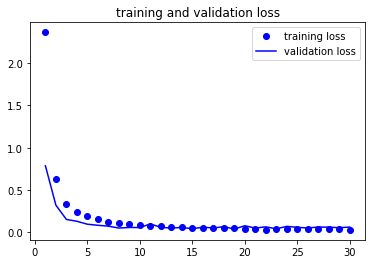

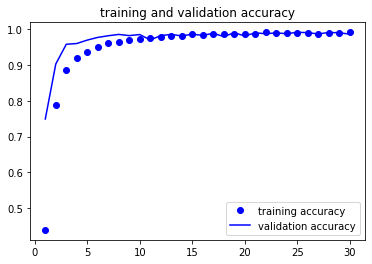

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

plt.plot(epochs,accuracy,'bo',label='training accuracy')
plt.plot(epochs,val_accuracy,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.show()

In [32]:
model.evaluate(X_test_reshaped,y_test_reshaped)

94/94 [==============================] - 1s 6ms/step - loss: 0.0588 - accuracy: 0.9877


[0.05879506096243858, 0.987666666507721]

# Final Accuracy : Around 98% ! 
To be noted, this model is the result of many, many attempts ... as i've had to face the classic problems like overfitting, underfitting, etc. 
A more challenging task would probably be to try the same thing, with less data. We would then resort to more complicated stuff, like using pretrained conv nets and finetuning them, use data augmentation, and all sorts of exotic methods. 